In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("TB_Data_2.csv")
df

,BookingStatus,Wno,ClassOfTravel,JourneyDate,Weekdays,Month,Days,Astatus
0,WL,9,3A,2/12/2016,6,12,2,1
1,WL,3,3A,1/12/2016,5,12,1,1
2,WL,1,2A,3/12/2016,7,12,3,0
3,WL,67,SL,3/12/2016,7,12,3,0
4,WL,61,SL,3/12/2016,7,12,3,0
...,...,...,...,...,...,...,...,...
3220,TQWL,25,SL,19-07-2018,5,7,19,0
3221,TQWL,53,SL,20-07-2018,6,7,20,0
3222,TQWL,58,SL,20-07-2018,6,7,20,0
3223,TQWL,52,SL,20-07-2018,6,7,20,0


In [3]:
df.isnull().sum(axis=0)

BookingStatus    0
Wno              0
ClassOfTravel    0
JourneyDate      0
Weekdays         0
Month            0
Days             0
Astatus          0
dtype: int64

In [4]:
df.head()

,BookingStatus,Wno,ClassOfTravel,JourneyDate,Weekdays,Month,Days,Astatus
0,WL,9,3A,2/12/2016,6,12,2,1
1,WL,3,3A,1/12/2016,5,12,1,1
2,WL,1,2A,3/12/2016,7,12,3,0
3,WL,67,SL,3/12/2016,7,12,3,0
4,WL,61,SL,3/12/2016,7,12,3,0


In [5]:
df.shape

(3225, 8)

In [6]:
df.drop(['JourneyDate'], 1, inplace=True)

In [7]:
df.head()

,BookingStatus,Wno,ClassOfTravel,Weekdays,Month,Days,Astatus
0,WL,9,3A,6,12,2,1
1,WL,3,3A,5,12,1,1
2,WL,1,2A,7,12,3,0
3,WL,67,SL,7,12,3,0
4,WL,61,SL,7,12,3,0


In [8]:
X = df.values[:,0:6]
y = df.values[:,6]
y=y.astype('int')
y

array([1, 1, 0, ..., 0, 0, 0])

In [9]:
X[:,0]=pd.factorize(X[:,0])[0]
X[:,2]=pd.factorize(X[:,2])[0]
X

array([[0, 9, 0, 6, 12, 2],
       [0, 3, 0, 5, 12, 1],
       [0, 1, 1, 7, 12, 3],
       ...,
       [1, 58, 2, 6, 7, 20],
       [1, 52, 2, 6, 7, 20],
       [1, 19, 2, 6, 7, 20]], dtype=object)

In [10]:
df.columns

Index(['BookingStatus', 'Wno', 'ClassOfTravel', 'Weekdays', 'Month', 'Days',
       'Astatus'],
      dtype='object')

In [11]:
discrete_features=['BookingStatus' ,  'Weekdays',  'Days']
continious_features=list(set(df.columns)-set(discrete_features) -{"Astatus"})

<AxesSubplot:>

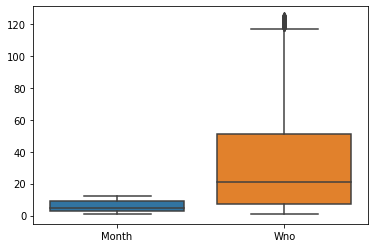

In [12]:
sns.boxplot(data=df[continious_features])

<AxesSubplot:xlabel='Weekdays', ylabel='Days'>

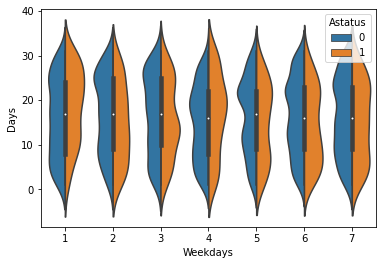

In [13]:
sns.violinplot(x="Weekdays",y="Days",data=df,hue="Astatus",split=True)

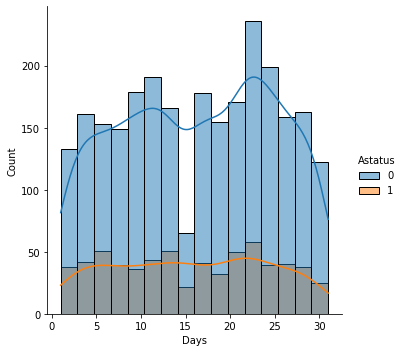

In [14]:
sns.displot(x="Days", data=df, hue="Astatus",kde=True)

C:\Users\User\anaconda3\New folder\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 14.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\User\anaconda3\New folder\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 67.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='BookingStatus', ylabel='Days'>

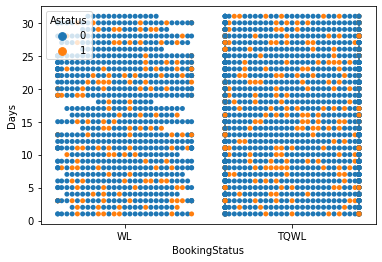

In [15]:
sns.swarmplot(x="BookingStatus",y="Days",data=df,hue="Astatus")

<AxesSubplot:>

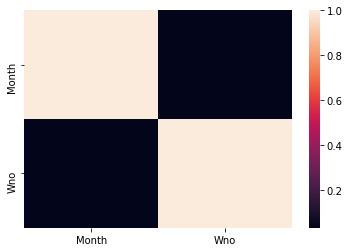

In [16]:
sns.heatmap(abs(df[continious_features].corr()))

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)

In [18]:
from sklearn.linear_model import LogisticRegression
cf =LogisticRegression()

In [19]:
cf.fit(X_train, y_train)

LogisticRegression()

In [20]:
Y_pred = cf.predict(X_test)

In [21]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, Y_pred)
cnf_matrix

array([[626,   0],
       [181,   0]], dtype=int64)

In [22]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
Log_roc = roc_auc_score(y_test, cf.predict(X_test))
fpr, tpr, thresholds=roc_curve(y_test, cf.predict_proba(X_test)[:,1])
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [23]:
import pickle
def predict(ml_model,dump):
    model=ml_model.fit(X_train,y_train)
    print('Training score : {}'.format(model.score(X_train,y_train)))
    y_prediction=model.predict(X_test)
    print('predictions are: \n {}'.format(y_prediction))
    print('\n')
    r2_score=metrics.r2_score(y_test,y_prediction)
    print('r2 score: {}'.format(r2_score))
    print('MAE:',metrics.mean_absolute_error(y_test,y_prediction))
    print('MSE:',metrics.mean_squared_error(y_test,y_prediction))
    print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_prediction)))
    sns.distplot(y_test-y_prediction)

Training score : 0.8553203439181517
predictions are: 
 [0.13333333 0.14       0.2        0.29       0.14       0.72
 0.04       0.01       0.07       0.89       0.08       0.06
 0.65       0.51       0.85       0.28333333 0.06       0.03
 0.41       0.38       0.         0.12       0.04       0.26
 0.04       0.17       0.01       0.01       0.2        0.22
 0.16       0.17       0.34       0.23683333 0.02       0.11
 0.14       0.14       0.17       0.01       0.02       0.01
 0.         0.17       0.05       0.86083333 0.06       0.08
 0.04       0.02       0.08       0.44       0.01       0.55866667
 0.09       0.01       0.05       0.03666667 0.01       0.
 0.01       0.01       0.51       0.14       0.         0.5425
 0.2705     0.09       0.43033333 0.3        0.06       0.
 0.18       0.32       0.15666667 0.15       0.08       0.13
 0.16       0.46       0.06       0.01       0.15583333 0.01
 0.05       0.49       0.         0.         0.01       0.43
 0.04       0.52333333 0.0

C:\Users\User\anaconda3\New folder\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


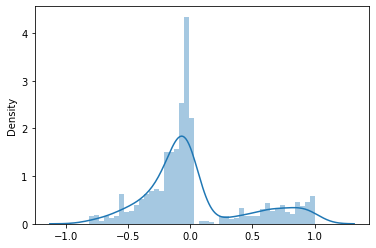

In [24]:
from sklearn.ensemble import RandomForestRegressor
predict(RandomForestRegressor(),1)

In [25]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score,r2_score


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import  MLPClassifier
from sklearn.svm import SVC


In [26]:
#Defined X value and y value , and split the data train
X = df.drop(columns="Astatus")           
y = df["Astatus"]    # y = quality

# split the data train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("X Train : ", X_train.shape)
print("X Test  : ", X_test.shape)
print("Y Train : ", y_train.shape)
print("Y Test  : ", y_test.shape)

X Train :  (2418, 6)
X Test  :  (807, 6)
Y Train :  (2418,)
Y Test  :  (807,)


In [27]:
LR = LogisticRegression()
DTR = DecisionTreeClassifier()
RFR = RandomForestClassifier()
KNR = KNeighborsClassifier()
MLP = MLPClassifier()
SVR=SVC()

In [28]:
from sklearn.model_selection import cross_val_score

In [29]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2)

In [30]:
from sklearn.tree import DecisionTreeClassifier